# 对分类变量的图表描述

- 对分类变量的描述分析，一般是对变量中的各类别进行对比分析、占比分析  
    对比分析的是不同类别的频数大小，占比分析的是不同类别频数占样本量的比例


- 图的底层都是表

In [186]:
# 导入R数据
load("D:/Rdata/example/ch2/example2_1.RData")

In [187]:
# 查看数据前几行
head(example2_1,5)

社区,性别,态度
A社区,男,反对
B社区,女,反对
D社区,女,反对
C社区,男,反对
A社区,男,赞成


In [188]:
# 统计量描述
summary(example2_1)

    社区    性别      态度   
 A社区:27   男:36   反对:31  
 B社区:17   女:44   赞成:49  
 C社区:21                    
 D社区:15                    

## 频数和频率分布表

### 一维频数（频率）分布表

In [189]:
# 求频数分布表
count1 <- table(example2_1$社区)
count2 <- table(example2_1$性别)
count3 <- table(example2_1$态度)

In [190]:
count1
count2
count3


A社区 B社区 C社区 D社区 
   27    17    21    15 


男 女 
36 44 


反对 赞成 
  31   49 

In [191]:
# 求频率分布表（百分比）
p1 <- prop.table(count1)*100   
p2 <- prop.table(count2)*100
p3 <- prop.table(count3)*100
p1
p2
p3


A社区 B社区 C社区 D社区 
33.75 21.25 26.25 18.75 


男 女 
45 55 


 反对  赞成 
38.75 61.25 

### 二维列联表

- 又称交叉表（cross table)

In [192]:
cro_table <- table(example2_1$社区, example2_1$性别)
cro_table

       
        男 女
  A社区  9 18
  B社区 10  7
  C社区 13  8
  D社区  4 11

In [193]:
# 增加边际和
addmargins(cro_table)    

# 频率分布表（乘以100可转换成百分比）
addmargins(prop.table(cro_table))   

,男,女,Sum
A社区,9,18,27
B社区,10,7,17
C社区,13,8,21
D社区,4,11,15
Sum,36,44,80


,男,女,Sum
A社区,0.1125,0.2250,0.3375
B社区,0.1250,0.0875,0.2125
C社区,0.1625,0.1000,0.2625
D社区,0.0500,0.1375,0.1875
Sum,0.4500,0.5500,1.0000


In [203]:
# install.packages("gmodels")

In [204]:
# 使用CrossTable函数生成二维列联表
library(gmodels)
CrossTable(example2_1$性别, example2_1$态度)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  80 

 
              | example2_1$态度 
example2_1$性别 |      反对 |      赞成 | Row Total | 
--------------|-----------|-----------|-----------|
           男 |        14 |        22 |        36 | 
              |     0.000 |     0.000 |           | 
              |     0.389 |     0.611 |     0.450 | 
              |     0.452 |     0.449 |           | 
              |     0.175 |     0.275 |           | 
--------------|-----------|-----------|-----------|
           女 |        17 |        27 |        44 | 
              |     0.000 |     0.000 |           | 
              |     0.386 |     0.614 |     0.550 | 
              |     0.548 |     0.551 |           | 
              |     0.212 |     0.338 |           | 
--------------|-----------|-----

### 多维列联表

- multidimensional contingency table

In [205]:
# 将数据框转成多维汇总表
mul_table <- table(example2_1)
mul_table

, , 态度 = 反对

       性别
社区    男 女
  A社区  4  9
  B社区  3  2
  C社区  5  2
  D社区  2  4

, , 态度 = 赞成

       性别
社区    男 女
  A社区  5  9
  B社区  7  5
  C社区  8  6
  D社区  2  7


In [206]:
# 将多维汇总表转成一张扁平表
fmul_table <- ftable(mul_table, row.vars=c('性别','态度'), col.vars = c('社区'))
fmul_table

          社区 A社区 B社区 C社区 D社区
性别 态度                             
男   反对          4     3     5     2
     赞成          5     7     8     2
女   反对          9     2     2     4
     赞成          9     5     6     7

In [207]:
# 增加边际汇总
fmul_table_sum <- ftable(addmargins(mul_table), row.vars=c('性别','态度'), col.vars = c('社区'))
fmul_table_sum

          社区 A社区 B社区 C社区 D社区 Sum
性别 态度                                 
男   反对          4     3     5     2  14
     赞成          5     7     8     2  22
     Sum           9    10    13     4  36
女   反对          9     2     2     4  17
     赞成          9     5     6     7  27
     Sum          18     7     8    11  44
Sum  反对         13     5     7     6  31
     赞成         14    12    14     9  49
     Sum          27    17    21    15  80

In [208]:
ftable(table(example2_1),row.vars=c('性别','态度'), col.vars = c('社区'))

          社区 A社区 B社区 C社区 D社区
性别 态度                             
男   反对          4     3     5     2
     赞成          5     7     8     2
女   反对          9     2     2     4
     赞成          9     5     6     7

## 分类变量的可视化

### 简单条形图和帕累托图

- 一个分类变量的图表描述

In [333]:
# 导入R数据
load("D:/Rdata/example/ch2/example2_1.RData")

In [334]:
# 生成频数分布表
fre_table <- table(example2_1$社区)
fre_table


A社区 B社区 C社区 D社区 
   27    17    21    15 

In [335]:
# 导入R数据
load("D:/Rdata/example/ch2/example2_1.RData")

In [336]:
# 生成频数分布表
fre_table <- table(example2_1$社区)
fre_table


A社区 B社区 C社区 D社区 
   27    17    21    15 

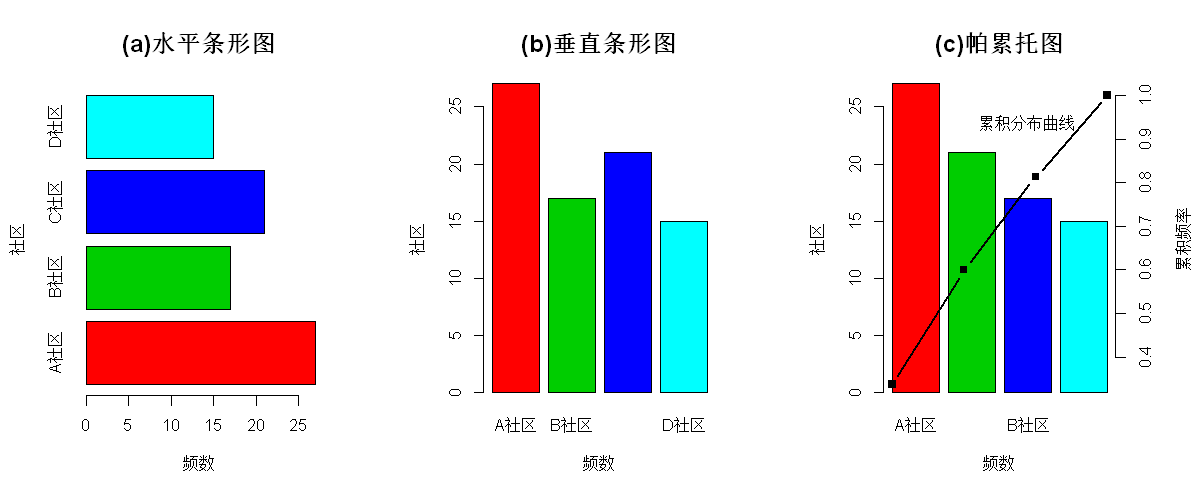

In [348]:
# 设置画布大小
options(repr.plot.width=10, repr.plot.height=4)

# 图形参数设置函数par()
par(
    mfrow=c(1,3),
    mai=c(0.7,0.7,0.7,0.7),  # 设置图形边距大小
    cex=0.8,
#     cex.lab = 0.7,
    cex.main=1.5    # 图形标题大小
)

# 水平条形图
barplot(fre_table, xlab = '频数', ylab = '社区', horiz = TRUE, main = '(a)水平条形图',col = 2:5)

# 垂直条形图
barplot(fre_table, xlab = '频数', ylab = '社区', horiz = FALSE, main = '(b)垂直条形图',col = 2:5)

# 帕累托图 
sort_fre_table <- sort(fre_table, decreasing = TRUE)   # 排序
barplot(sort_fre_table, xlab = '频数', ylab = '社区', main = '(c)帕累托图', col = 2:5)    # 排序后的垂直条形图
cum_pro <- cumsum(sort_fre_table)/sum(sort_fre_table)    # 计算累积百分比
par(new = TRUE)    # 继续在当前子画布上作图
plot(cum_pro, 
     type = 'b',    # 线图种类，"b"是点线结合的方式
     lwd = 2,     # 线宽
     pch = 15,    # 点的种类
     axes = FALSE,    # 取消坐标轴
     xlab = '',      #  横坐标轴标题为空
     ylab = '',      #  纵坐标轴标题为空
     main = ''       #  标题为空
    )
axis(4)   # 坐标轴设置，添加右侧纵坐标轴
par(las = 0)  # 设置坐标轴标题方向
mtext('累积频率', side = 4, line = 3, cex = 0.8, adj = 0.5)   # 在当前图形区域的四个边缘之一,显示文本
mtext('累积分布曲线', 
      side = 3,     # 第3个边缘，即上边缘 
      line = -2.5,   # 距离边缘的相对距离
      cex = 0.8,     # 文字和符号的大小缩小为80%
      adj = 0.7     # 对齐方式 0-1，0.5是居中
     )   

### 饼图和扇形图

- 一个分类变量的图表描述

- 饼图适用于观测样本数据的整体结构；扇形图能更加直观的看出各类别占比的大小顺序，方便类别直接进行比较。

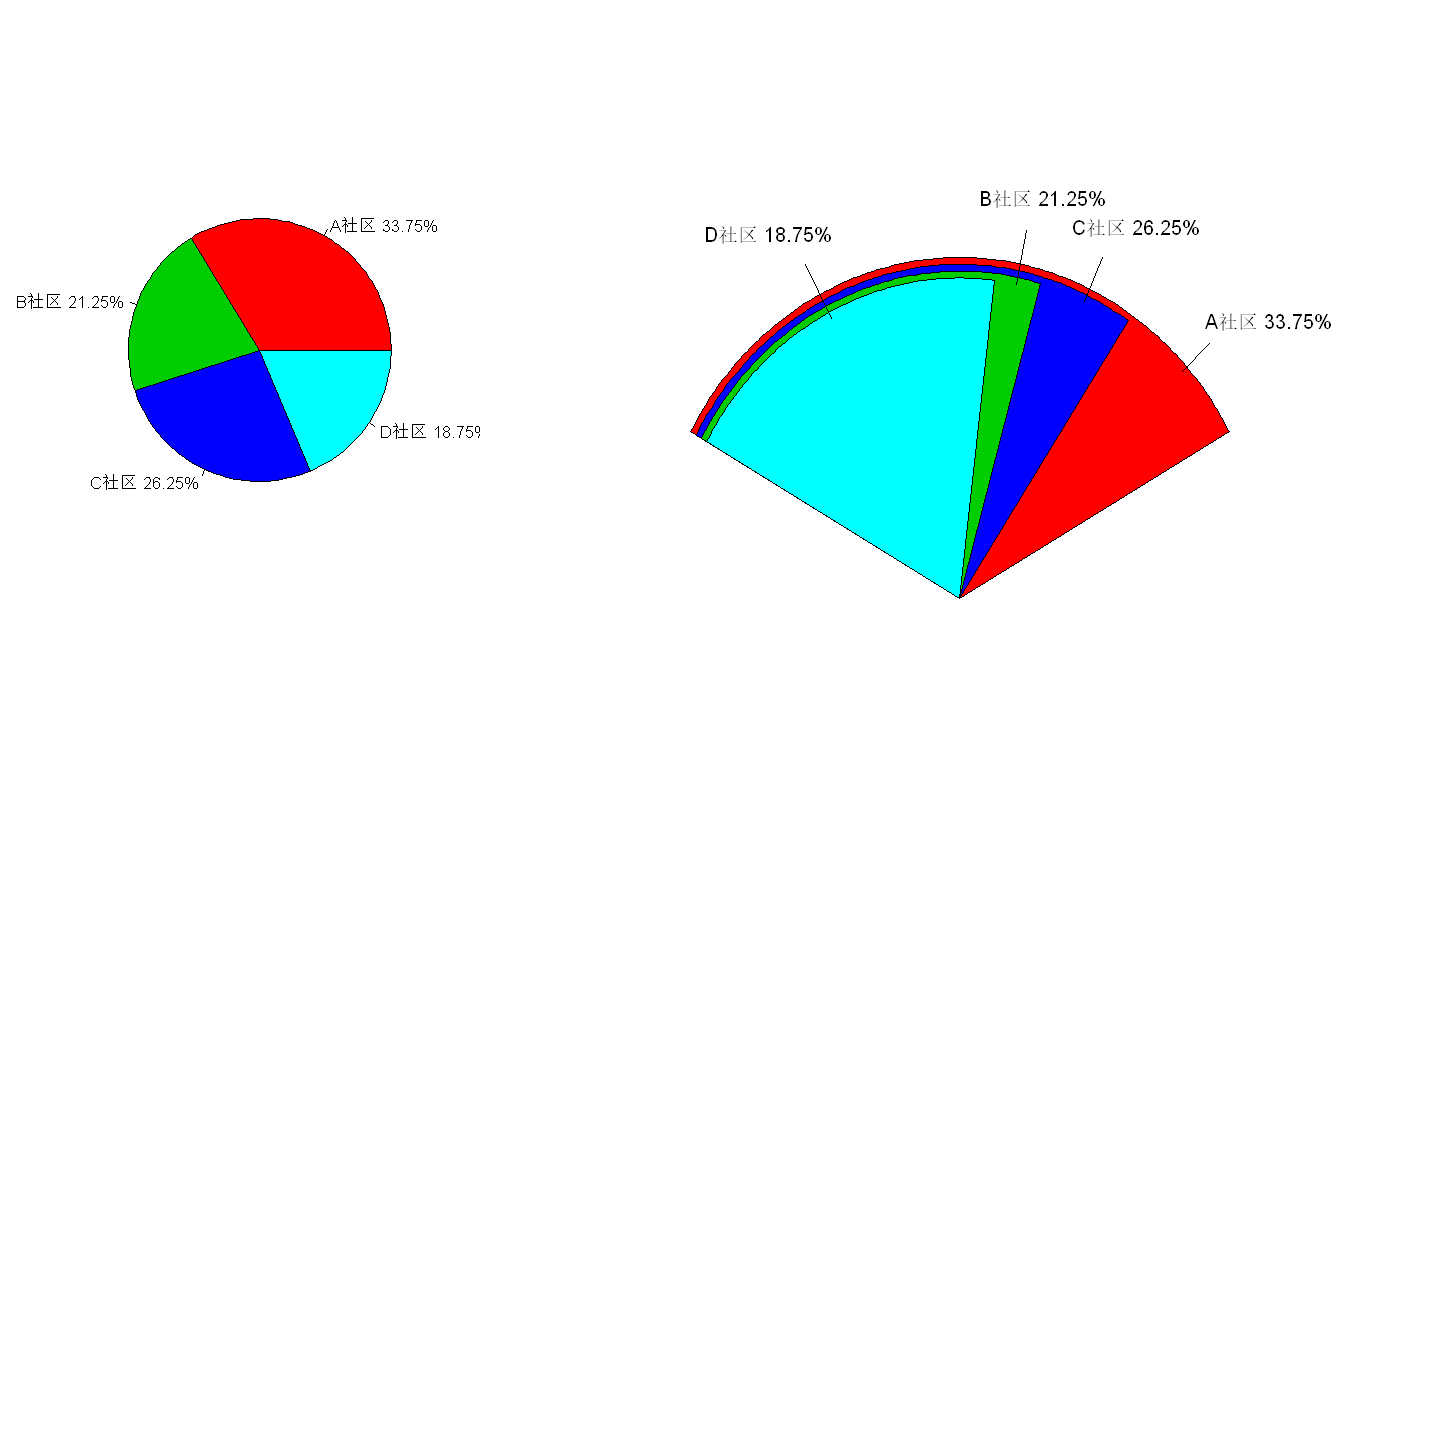

In [459]:
# 设置画布大小
options(repr.plot.width=12, repr.plot.height=12)

# 设置画布布局
layout(matrix(c(1,0,2,0),2,2),widths = c(1,2),heights = c(1,1))

# 饼图
name <- names(fre_table)
percent <- prop.table(fre_table)*100
label_pie <- paste(name," ",percent,"%",sep="")
pie(fre_table, labels=label_pie, col = 2:5)

# 扇形图
# install.packages('plotrix')
# library(plotrix)
name <- names(fre_table)
percent <- prop.table(fre_table)*100
label_pie <- paste(name," ",percent,"%",sep="")
fan.plot(fre_table, labels=label_pie, col = 2:5)

### 复式条形图和脊形（柱）图

- 两个分类变量的图表描述

In [338]:
# 导入R数据
load("D:/Rdata/example/ch2/example2_1.RData")

In [339]:
# 生成频数分布表
fre_cross_table <- table(example2_1$性别, example2_1$社区)
fre_cross_table

    
     A社区 B社区 C社区 D社区
  男     9    10    13     4
  女    18     7     8    11

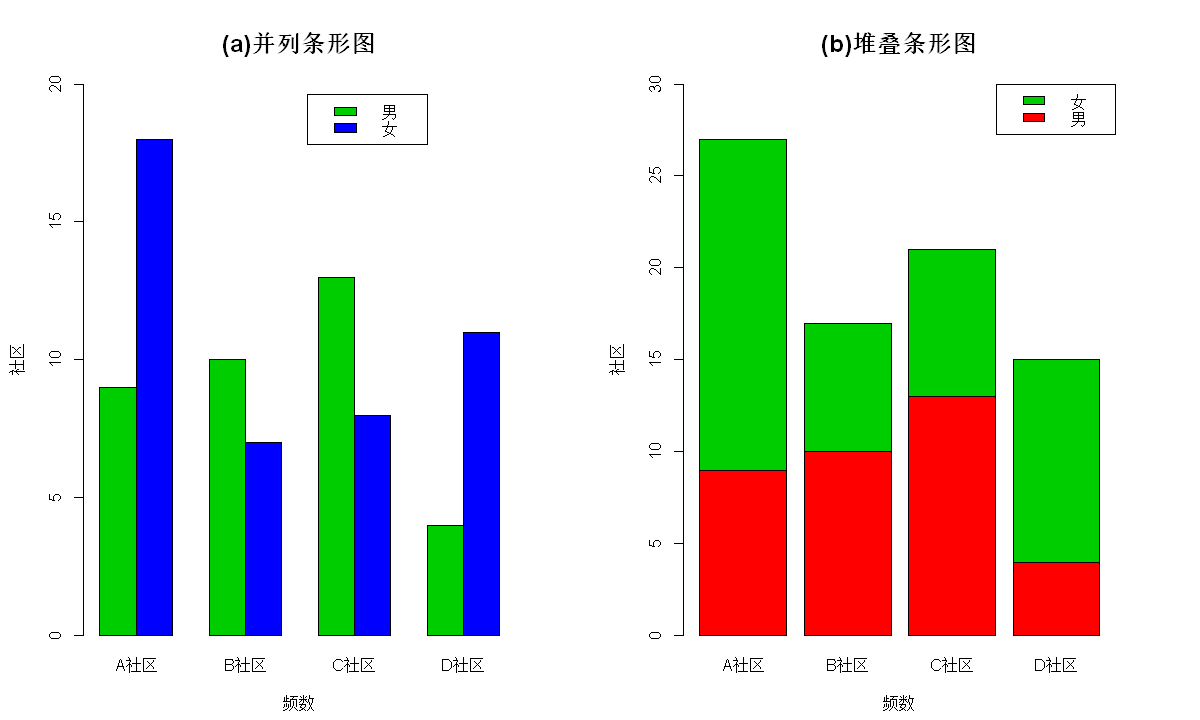

In [359]:
# 设置画布大小
options(repr.plot.width=10, repr.plot.height=6)

# 图形参数设置函数par()
par(
    mfrow=c(1,2),
    mai=c(0.7,0.7,0.7,0.7),  # 设置图形边距大小
    cex=0.8,
#     cex.lab = 0.7,
    cex.main=1.5    # 图形标题大小
)

# 并列（簇状）条形图
barplot(fre_cross_table, xlab = '频数', ylab = '社区', horiz = FALSE, main = '(a)并列条形图',col = 3:4, ylim = c(0,20),
        beside = TRUE, legend=rownames(fre_cross_table), 
        args.legend = list(x =10)   # 设置图例的位置，数字表示相对左纵轴的位置
       )

# 堆叠条形图
barplot(fre_cross_table, xlab = '频数', ylab = '社区', horiz = FALSE, main = '(b)堆叠条形图',col = 2:3, ylim = c(0,30),
        beside = FALSE, legend=rownames(fre_cross_table),
        args.legend = list(x ='topright')   # 设置图例的位置
       )



- 脊形（柱）图

In [1]:
# 导入R数据
load("D:/Rdata/example/ch2/example2_1.RData")
head(example2_1)

社区,性别,态度
A社区,男,反对
B社区,女,反对
D社区,女,反对
C社区,男,反对
A社区,男,赞成
D社区,女,反对


In [361]:
# 生成频数分布表
fre_mul_table <- table(example2_1$性别, example2_1$社区)
fre_mul_table

    
     A社区 B社区 C社区 D社区
  男     9    10    13     4
  女    18     7     8    11

In [362]:
pro

A社区  C社区  B社区  D社区 
0.3375 0.6000 0.8125 1.0000

In [363]:
# install.packages('lmtest')
# install.packages('vcd')
library(vcd)

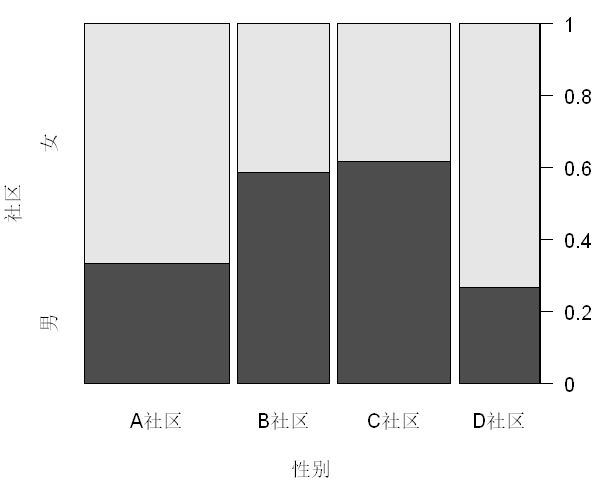

In [364]:
# 设置画布大小
options(repr.plot.width=5, repr.plot.height=4)

# 脊形（柱）图：堆叠条形图变种，了解即可
spine(性别~社区, data = example2_1, xlab = '性别', ylab = '社区', margins = c(4,3.5,1,2.5))

### 马赛克图（多分类变量图表描述）

- 了解即可

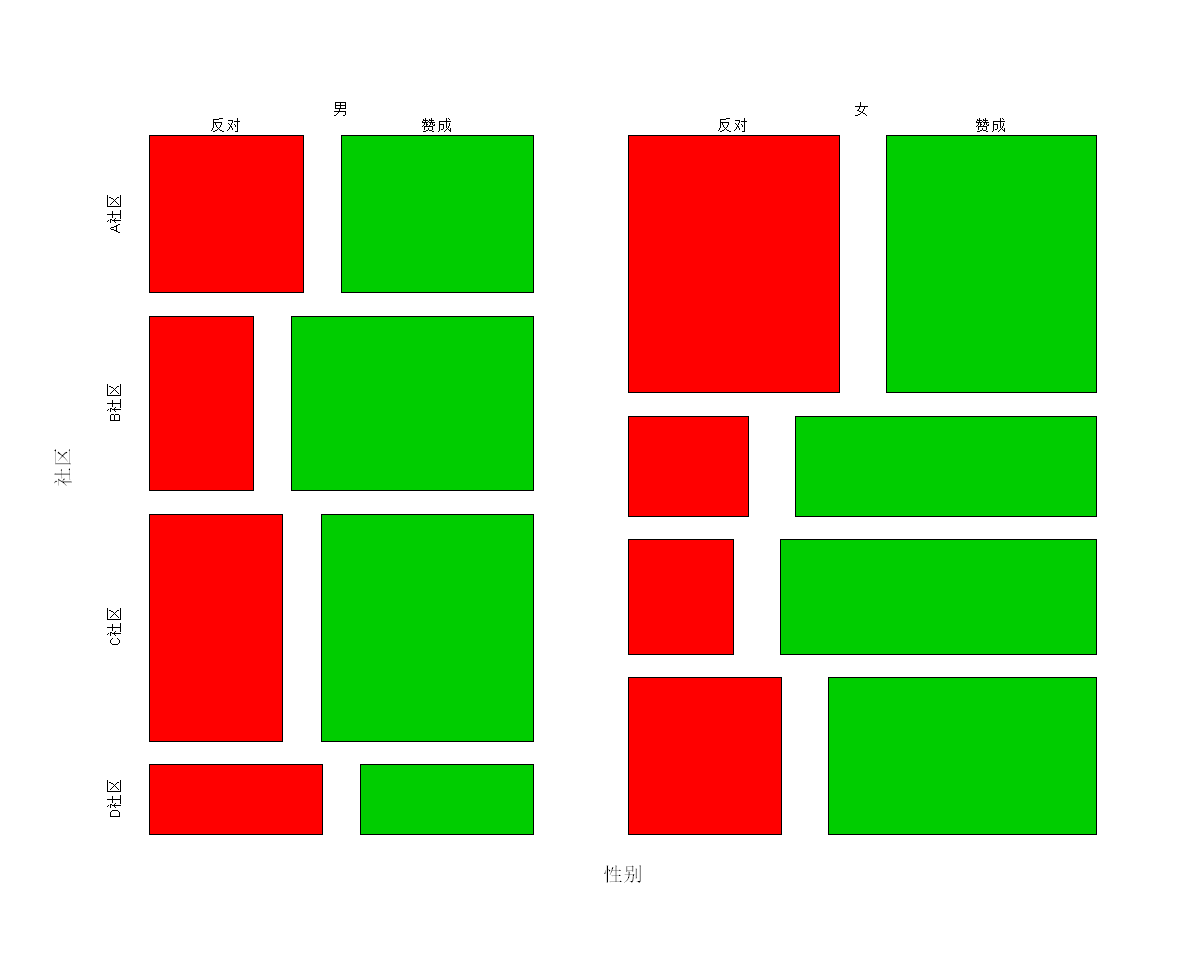

In [365]:
# 设置画布大小
options(repr.plot.width=10, repr.plot.height=8)
mosaicplot(~性别+社区+态度, data = example2_1, color = 2:3, main = '')

# 分类变量的描述统计量

## 描述水平的统计量（集中趋势度量）：众数

In [43]:
load("D:\\Rdata\\example\\ch3\\example3_1.RData")
head(example3_1,5)

分数
85
55
91
66
79


In [44]:
# 众数（mode)
mo <- which.max(table(example3_1))
mo

86 
14

In [45]:
names(mo) <- NULL

In [46]:
mo

[1] 14

## 描述差异的统计量（离散程度度量）：异众比率

- 通过异众比率判断众数的代表性好不好

In [47]:
s <- sum(table(example3_1))

# 异众比率（variation ratio）
vs <- (s-mo)/s
vs

[1] 0.5333333